### Linear Regression

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')

print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

/home/dhkang/data3/work/AI_Study/ML-AI_Study/dlenv/lib/python3.12/site-packages/sklearn/datasets/_openml.py:324: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [45]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["TARGET"] = boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


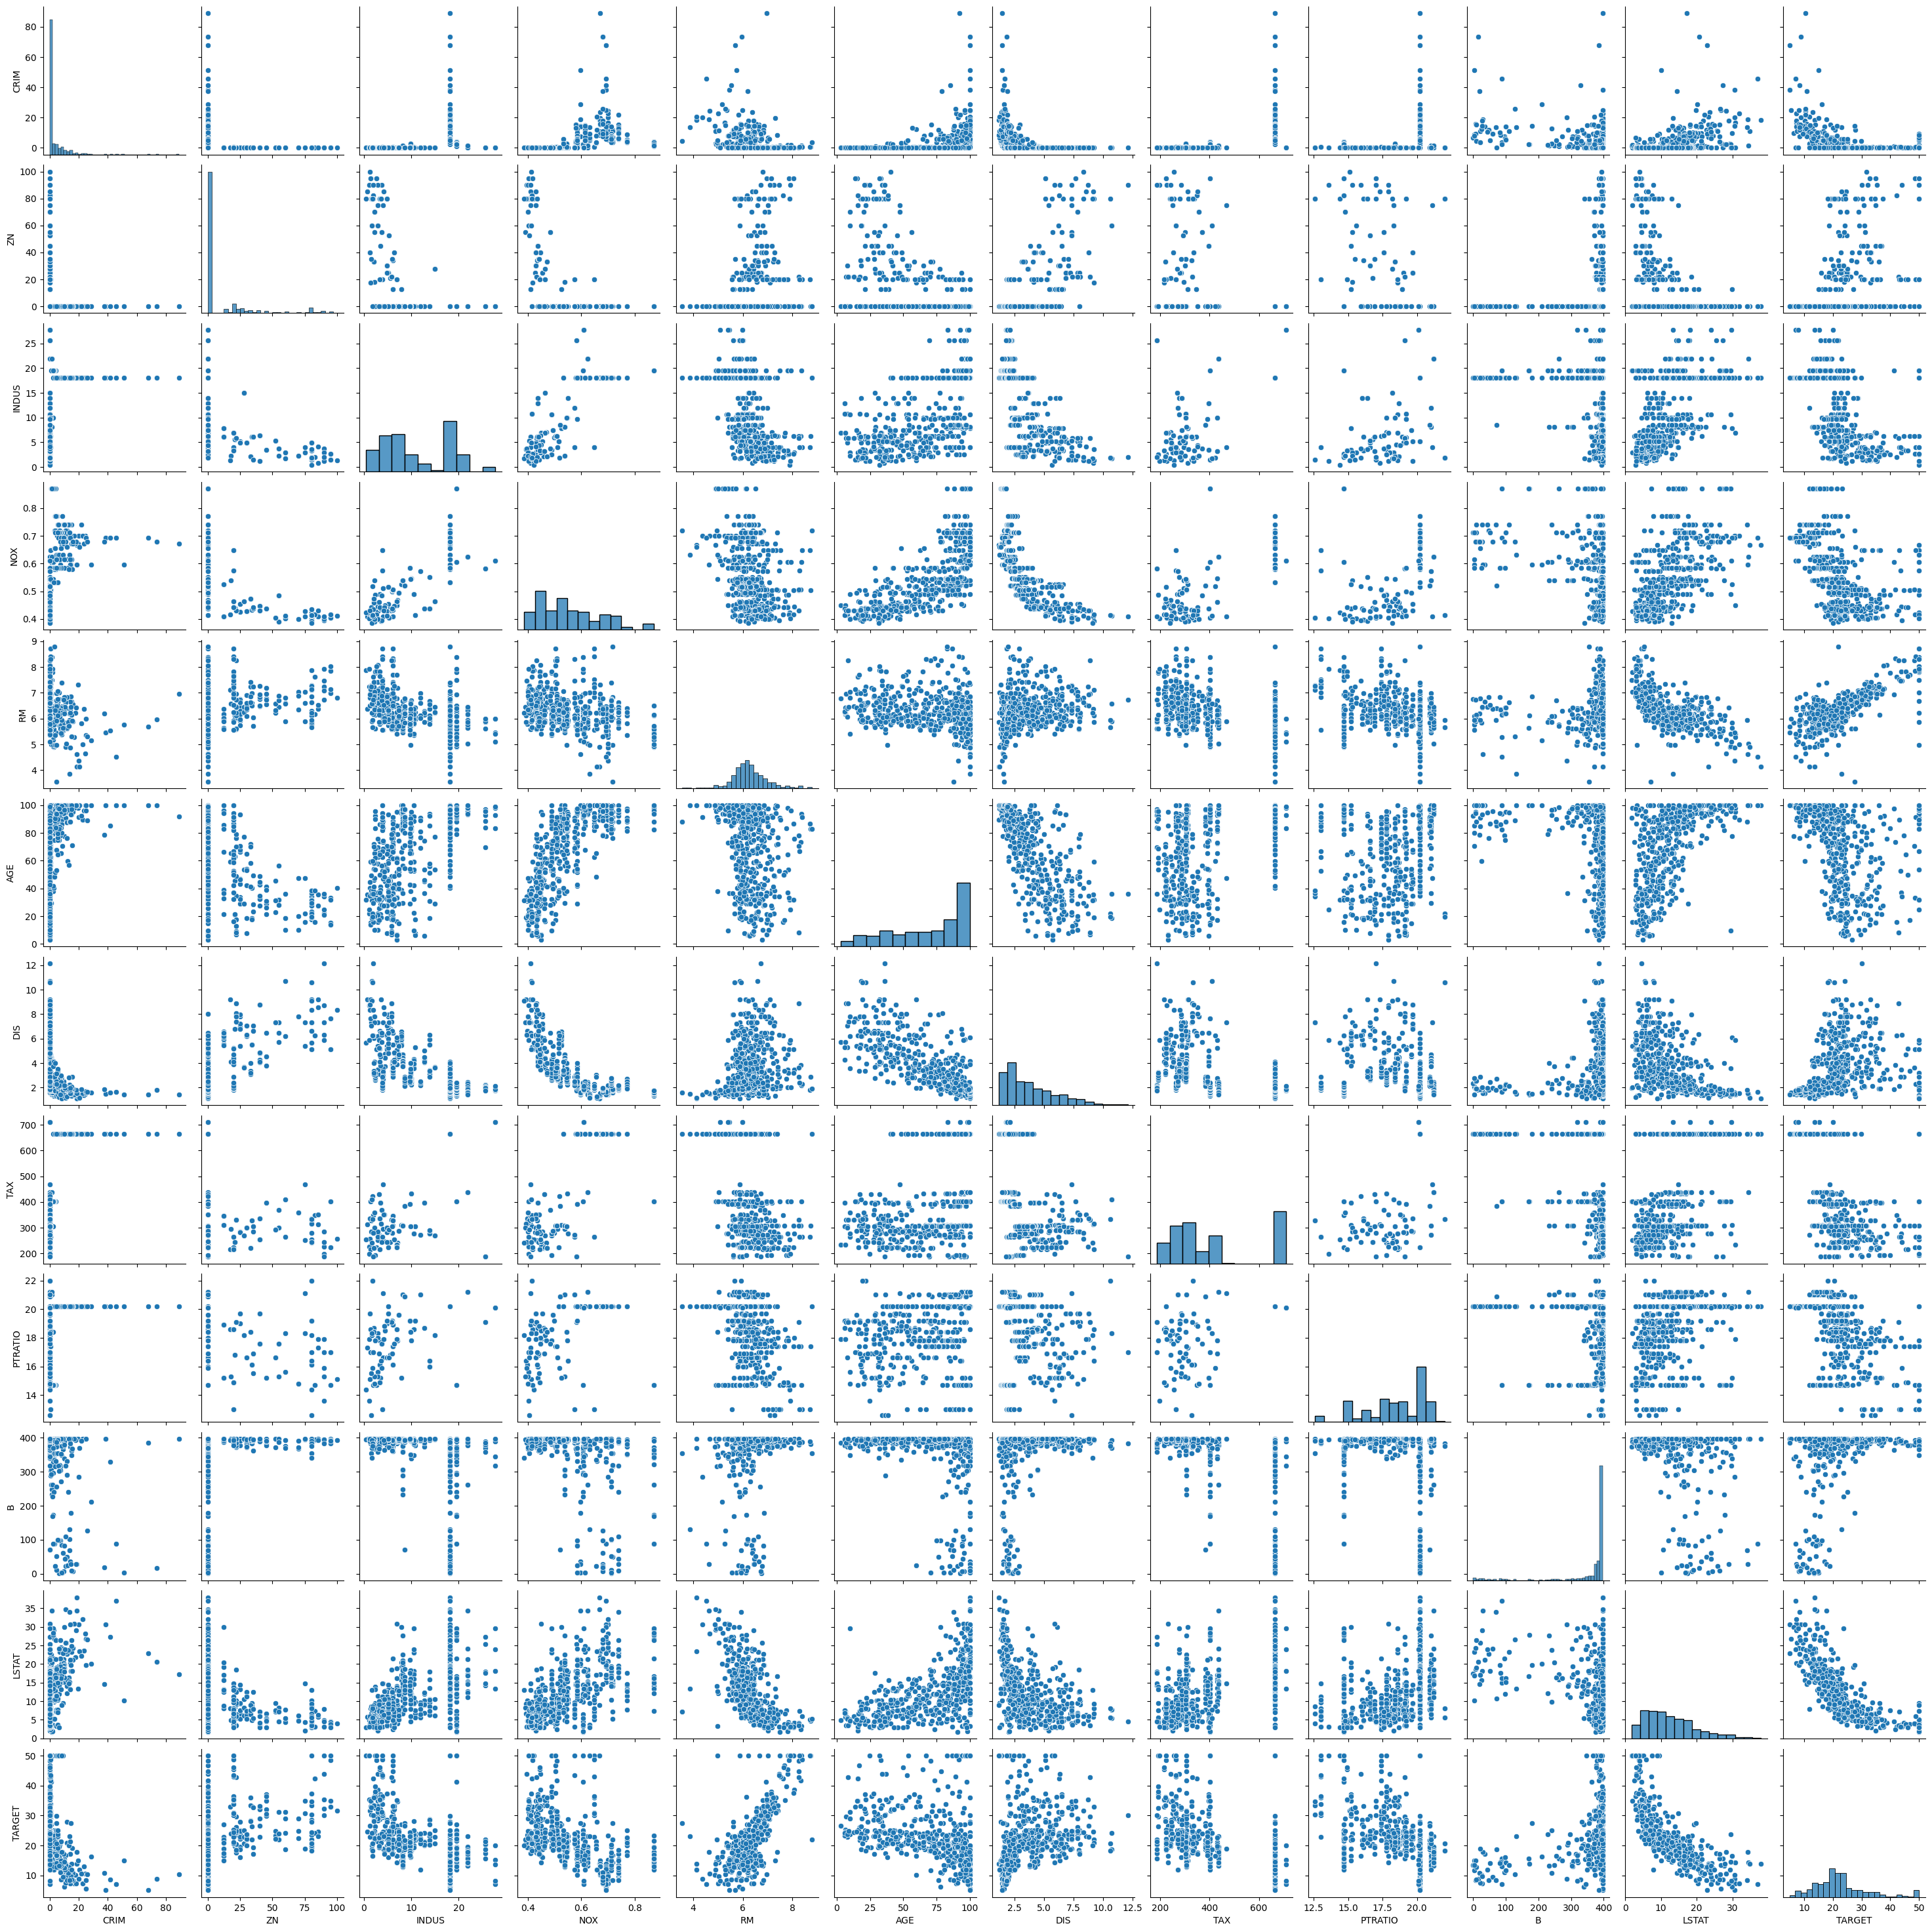

In [46]:
sns.pairplot(df)
plt.show()

In [47]:
cols = ["TARGET", "INDUS", "RM", "LSTAT", "NOX", "DIS"]
df[cols].describe()

,TARGET,INDUS,RM,LSTAT,NOX,DIS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,11.136779,6.284634,12.653063,0.554695,3.795043
std,9.197104,6.860353,0.702617,7.141062,0.115878,2.105710
min,5.000000,0.460000,3.561000,1.730000,0.385000,1.129600
25%,17.025000,5.190000,5.885500,6.950000,0.449000,2.100175
50%,21.200000,9.690000,6.208500,11.360000,0.538000,3.207450
75%,25.000000,18.100000,6.623500,16.955000,0.624000,5.188425
max,50.000000,27.740000,8.780000,37.970000,0.871000,12.126500


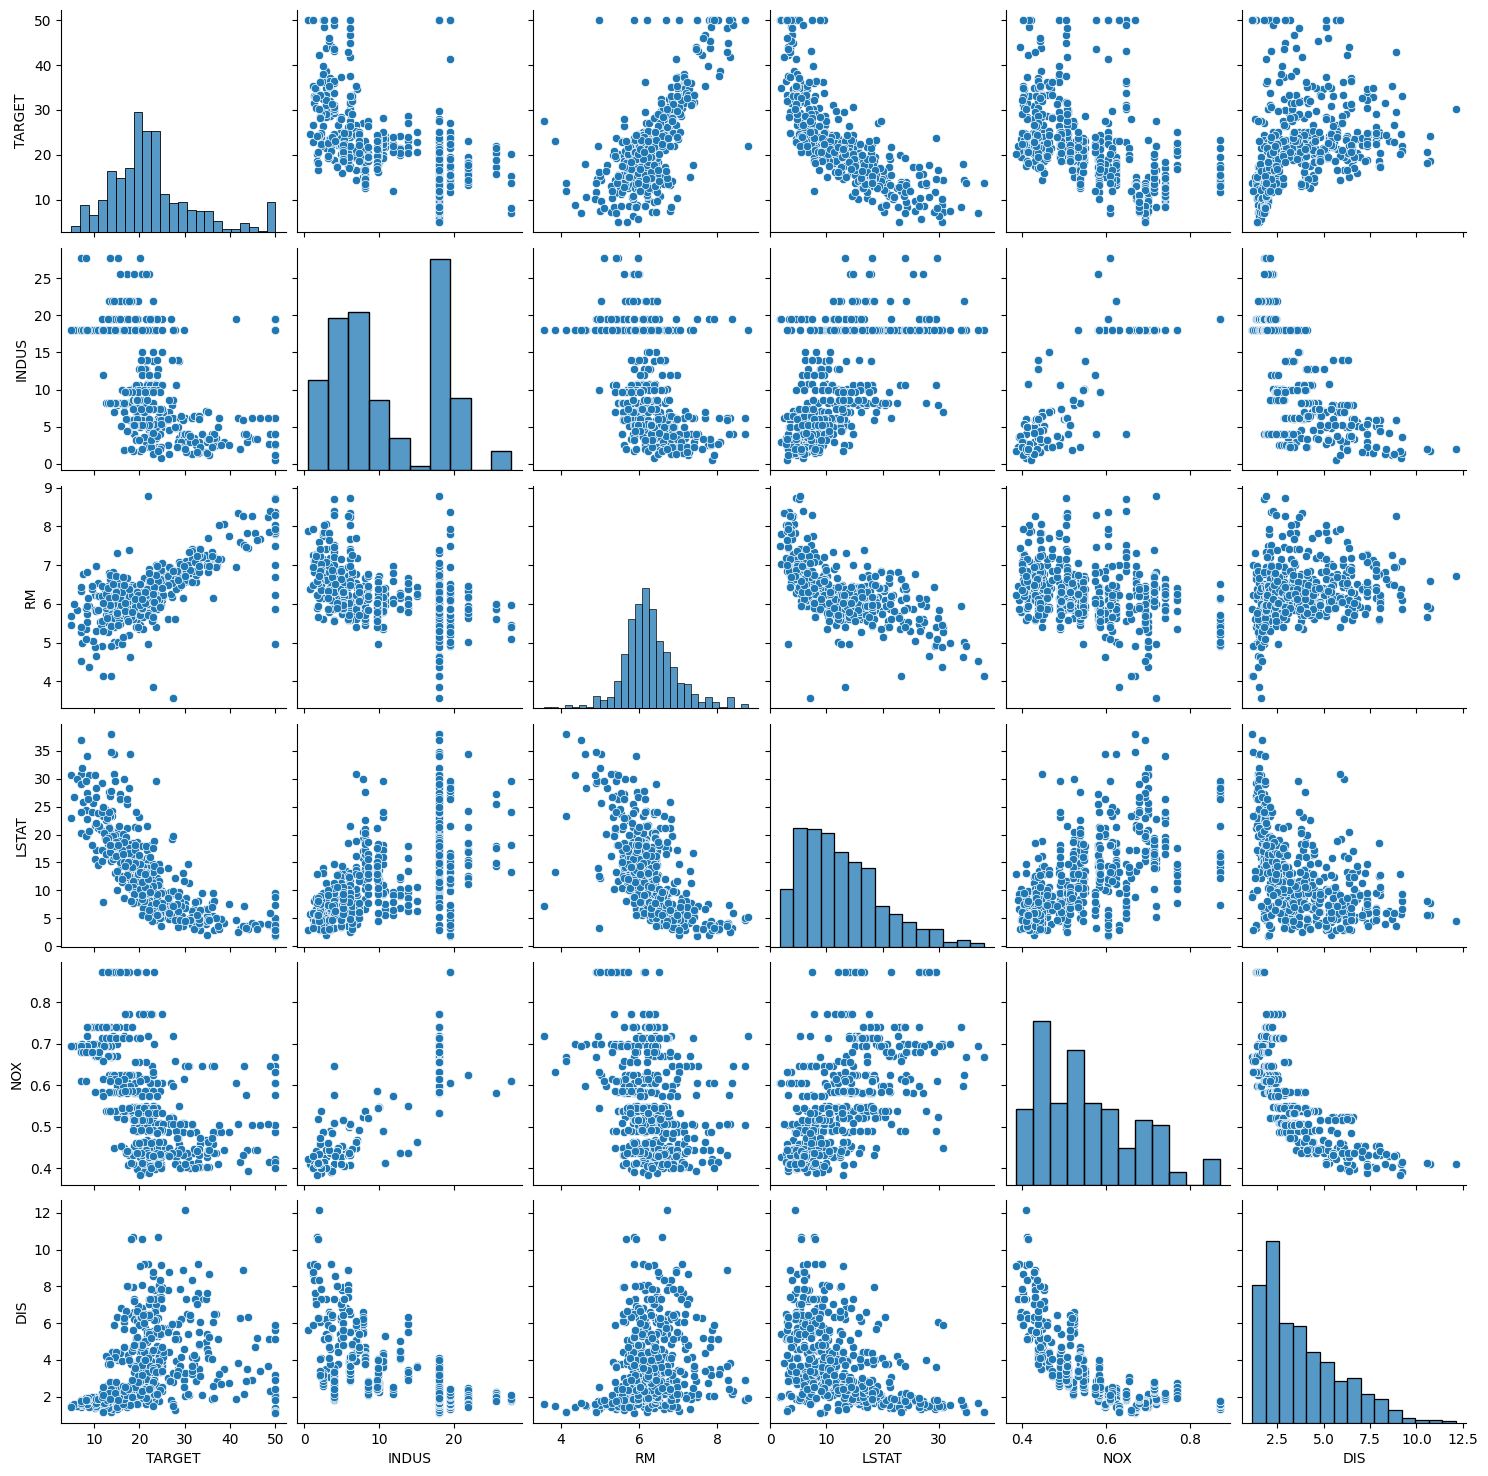

In [48]:
sns.pairplot(df[cols])
plt.show()

### Train Linear Model with PyTorch

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [50]:
data = torch.from_numpy(df[cols].values).float().cuda()
print(f"data.size(): {data.size()}")

data.size(): torch.Size([506, 6])


In [51]:
## Split X and Y 
y = data[:, :1]
x = data[:, 1:]

print(f"x.shape:{x.shape}, y.shape:{y.shape}")

x.shape:torch.Size([506, 5]), y.shape:torch.Size([506, 1])


In [52]:
## Define Configuration
n_epochs = 1000
learning_rate = 1e-3
print_interval = 100

In [59]:
## Define Model
model = nn.Linear(x.size(-1), y.size(-1)).cuda()
print(f"x.size(-1):{x.size(-1)}, y.size(-1):{y.size(-1)}")
model

x.size(-1):5, y.size(-1):1


Linear(in_features=5, out_features=1, bias=True)

In [54]:
## Instead of implement gradient equation,
## We can use <optim class> to update model parameters, automatically.
optimizer = optim.SGD(model.parameters(),
                      lr=learning_rate)

In [ ]:
## Whole Training Samples are used in 1 epoch.
## Thus, "N epochs" means that model saw a sample N-times.

for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad() 
    loss.backward()     ## Loss Function의 편미분 
    optimizer.step()
    
    if (i+1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i+1, loss))

Epoch 100: loss=2.8381e+01
Epoch 200: loss=2.8381e+01
Epoch 300: loss=2.8381e+01
Epoch 400: loss=2.8381e+01
Epoch 500: loss=2.8381e+01
Epoch 600: loss=2.8381e+01
Epoch 700: loss=2.8380e+01
Epoch 800: loss=2.8380e+01
Epoch 900: loss=2.8380e+01
Epoch 1000: loss=2.8380e+01
